<a href="https://colab.research.google.com/github/aysckmk/BLPS254/blob/main/SpotifyListeCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Spotify Recommendation Model Categorizing Existing Playlists by Song Mode**

---


# **Summary and Motivation**



*  Recommendation models are used as a factor in many areas. In e-commerce platforms, social media platforms, media service providers and many other areas, they appear with user, product and hybrid-based bidding engines. Music service provider platforms also work in a structure that has adopted these recommendation systems. The methodology underlying recommendation systems is based on the principle of similarity.  The various norms used in recommender systems have their own advantages and disadvantages, both within and between each other. It is possible to mitigate the disadvantages by utilizing their unique properties.  
*   In this project, the problem of prediction is addressed in order to find a solution to the complexity of the playlists opened by the user of Spotify, which is considered one of the largest music service provider platforms. Using the songs provided in the dataset, Spotify categorizes the songs in the playlists based on the mode of these songs and offers a suggestion to create a new playlist.


* My main motivation for developing this project is that I have experienced the impact of music on people's lives intensely in the last few days.
* Research shows that music activates areas of the brain where emotions arise. Listening to music also stimulates areas of the brain responsible for memory and reward mechanisms.
You may attribute the sadness of a song to its lyrics. But songs that are just melodies can also affect us emotionally. The arrangement of different tonal sounds determines how we perceive the music we hear emotionally. For example, sad melodies usually have a minor scale, while more upbeat melodies have a major scale. Research shows that the limbic system in the brain, which is responsible for eliciting emotions, is more active when listening to melodies with minor scales. Scientists say that a similar mechanism is active when we speak, and that the order in which sounds of different frequencies follow each other during speech determines whether our tone is angry, happy or sad.
* When I look at my life, when I am sad, when I am happy, when I am angry, I associate every emotional state with music. I wanted to make a study on a situation that affects people so much. Especially the biggest problem is in playlists where I add every song I like without thinking about it. Depending on my emotional state, most of the songs on that list are not appropriate at that moment. My goal is to develop a model that categorizes the playlists I create according to the mood of the songs. In this way, I can listen to music according to my mood at that moment, thanks to the model that separates the songs that only I like and choose according to their mood.





> **TABLE OF CONTENTS**

1.  Data Preparation
2. Analysis
2.  Model Development
3.  Visualizing Clusters
4.  Results and Discussion
5.  Conclusion and Future Works
6.  References





# **1. Data Set and Preparation**

In [163]:
!pip install spotipy pandas seaborn scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# user's credential
client_id = 'b863d74144ac488a8ae17d755cd14548'
client_secret = 'b8d9066ab43f44a7acb9edc6990a0305'

# user and playlist details
user_id = '	11125197184'
playlist_id = '0akDfyCydrG9Pj8EKlyogh'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

id_test = sp.user_playlist_tracks(user_id, playlist_id)['items'][0]['track']['id']

columns = ['artist', 'track']
list(map(lambda x: columns.append(x), list(sp.audio_features(id_test)[0].keys())))

# Set to range 0 to 100 - max playlist track count (limit 100)
playlist_tracks = pd.DataFrame(columns = columns, index = range(0, 1000))
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
playlist_ids = ['0akDfyCydrG9Pj8EKlyogh']
row_counter = 0

# Tracks and their audio features
for playlist_id in playlist_ids:
    for track in sp.user_playlist_tracks(user_id, playlist_id)['items']:
        current_id = track['track']['id']
        current_row = [track['track']['artists'][0]['name'], track['track']['name']]
        (list(map(lambda x: current_row.append(x), list(sp.audio_features(current_id)[0].values()))))
        playlist_tracks.iloc[row_counter] = current_row
        row_counter += 1
playlist_tracks

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Britney Spears,Criminal,0.696,0.734,7,-5.294,1,0.0298,0.0485,0,0.183,0.711,107.987,audio_features,6T689Jvh5KrSXyaPtUWZtQ,spotify:track:6T689Jvh5KrSXyaPtUWZtQ,https://api.spotify.com/v1/tracks/6T689Jvh5KrS...,https://api.spotify.com/v1/audio-analysis/6T68...,225080,4
1,Manuş Baba,Bu Havada Gidilmez,0.581,0.717,5,-5.325,0,0.026,0.217,0.000051,0.307,0.584,95.027,audio_features,4ajGA8mtD6R2JylEbRLp5n,spotify:track:4ajGA8mtD6R2JylEbRLp5n,https://api.spotify.com/v1/tracks/4ajGA8mtD6R2...,https://api.spotify.com/v1/audio-analysis/4ajG...,229587,4
2,Cihan Mürtezaoğlu,Bana Sor (Canlı),0.294,0.312,6,-12.008,0,0.0346,0.897,0,0.154,0.399,142.878,audio_features,56vn8O26V1D6ANY3WKgE7B,spotify:track:56vn8O26V1D6ANY3WKgE7B,https://api.spotify.com/v1/tracks/56vn8O26V1D6...,https://api.spotify.com/v1/audio-analysis/56vn...,306059,4
3,Melek Mosso,Keklik Gibi,0.476,0.263,9,-9.166,0,0.0282,0.659,0.000014,0.135,0.182,139.81,audio_features,5AKbyqDRAm2A7mDlSx5aBi,spotify:track:5AKbyqDRAm2A7mDlSx5aBi,https://api.spotify.com/v1/tracks/5AKbyqDRAm2A...,https://api.spotify.com/v1/audio-analysis/5AKb...,285387,4
4,Melike Şahin,Tutuşmuş Beraber,0.576,0.177,11,-15.799,0,0.068,0.935,0.00229,0.107,0.421,124.642,audio_features,0ELKA403grwyEZLPMzJRKs,spotify:track:0ELKA403grwyEZLPMzJRKs,https://api.spotify.com/v1/tracks/0ELKA403grwy...,https://api.spotify.com/v1/audio-analysis/0ELK...,279127,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
playlist_tracks = playlist_tracks.dropna(how = "all") 
playlist_tracks.drop(["artist","track","type","id","uri","track_href","analysis_url"], axis=1,inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now that we have all the songs in the playlist that I want to reorganize and the audio characteristics of those songs, let's make sure that we only have the relevant columns and that the data types of all variables are as numeric as possible.

In [167]:
playlist_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   danceability      100 non-null    object
 1   energy            100 non-null    object
 2   key               100 non-null    object
 3   loudness          100 non-null    object
 4   mode              100 non-null    object
 5   speechiness       100 non-null    object
 6   acousticness      100 non-null    object
 7   instrumentalness  100 non-null    object
 8   liveness          100 non-null    object
 9   valence           100 non-null    object
 10  tempo             100 non-null    object
 11  duration_ms       100 non-null    object
 12  time_signature    100 non-null    object
dtypes: object(13)
memory usage: 10.9+ KB


We are doing type editing for Dataset.

In [168]:
playlist_tracks = playlist_tracks.astype(
    {
        "danceability": float,
        "energy": float,
        "key": int,
        "loudness": float,
        "mode": int,
        "speechiness": float,
        "acousticness": float,
        "instrumentalness": float,
        "liveness": float,
        "valence": float,
        "tempo": float,
        "duration_ms": float,
        "time_signature": float,
    }
)
playlist_tracks.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

Our data set is now ready for analysis.

In [169]:
playlist_tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.581760,0.478430,4.930000,-9.369320,0.240000,0.065259,0.490256,0.046825,0.173343,0.432547,119.973190,231859.570000,3.890000
std,0.143837,0.186952,3.303671,3.252159,0.429235,0.071088,0.318950,0.156029,0.114638,0.211375,32.114601,51082.907191,0.423907
min,0.235000,0.156000,0.000000,-17.705000,0.000000,0.026000,0.000509,0.000000,0.052600,0.038100,60.944000,142421.000000,1.000000
25%,0.472250,0.349000,2.000000,-11.362000,0.000000,0.033575,0.156750,0.000000,0.104000,0.278000,94.349250,196437.250000,4.000000
50%,0.595500,0.460500,5.000000,-8.708000,0.000000,0.041400,0.547000,0.000014,0.129000,0.435500,118.358000,225080.000000,4.000000
75%,0.670750,0.621000,7.000000,-7.136500,0.000000,0.068275,0.766500,0.001900,0.201250,0.585500,141.095000,258742.750000,4.000000
max,0.937000,0.883000,11.000000,-3.908000,1.000000,0.506000,0.951000,0.879000,0.694000,0.872000,209.873000,400705.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1769dcf880>,
      dtype=object)

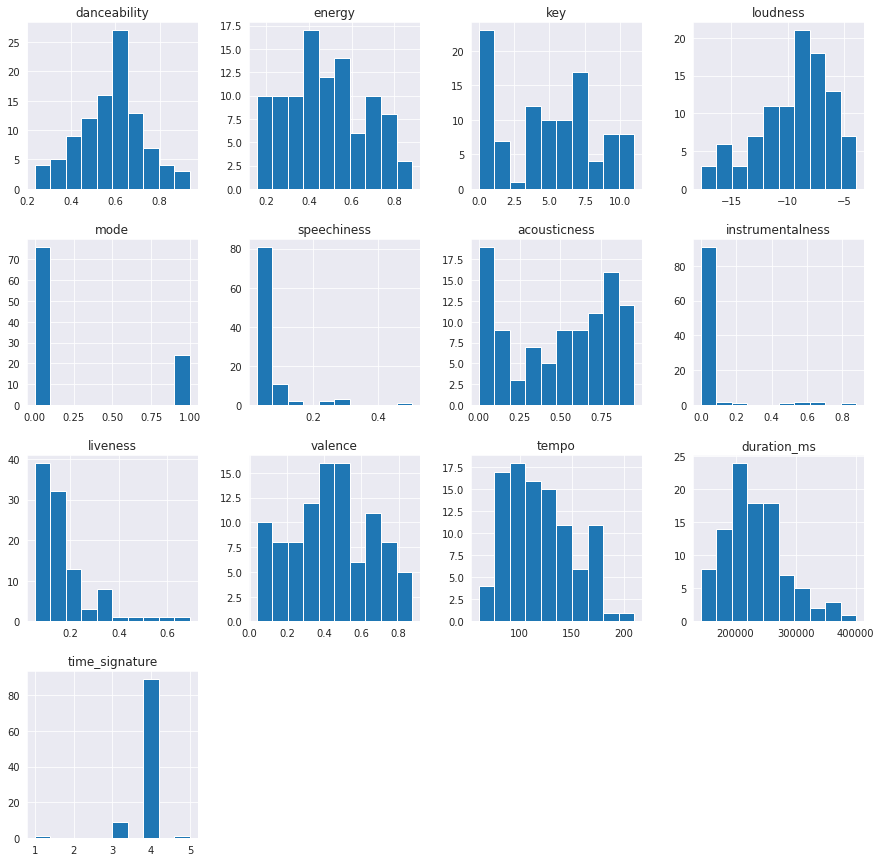

In [170]:
playlist_tracks.hist(figsize=(15, 15))

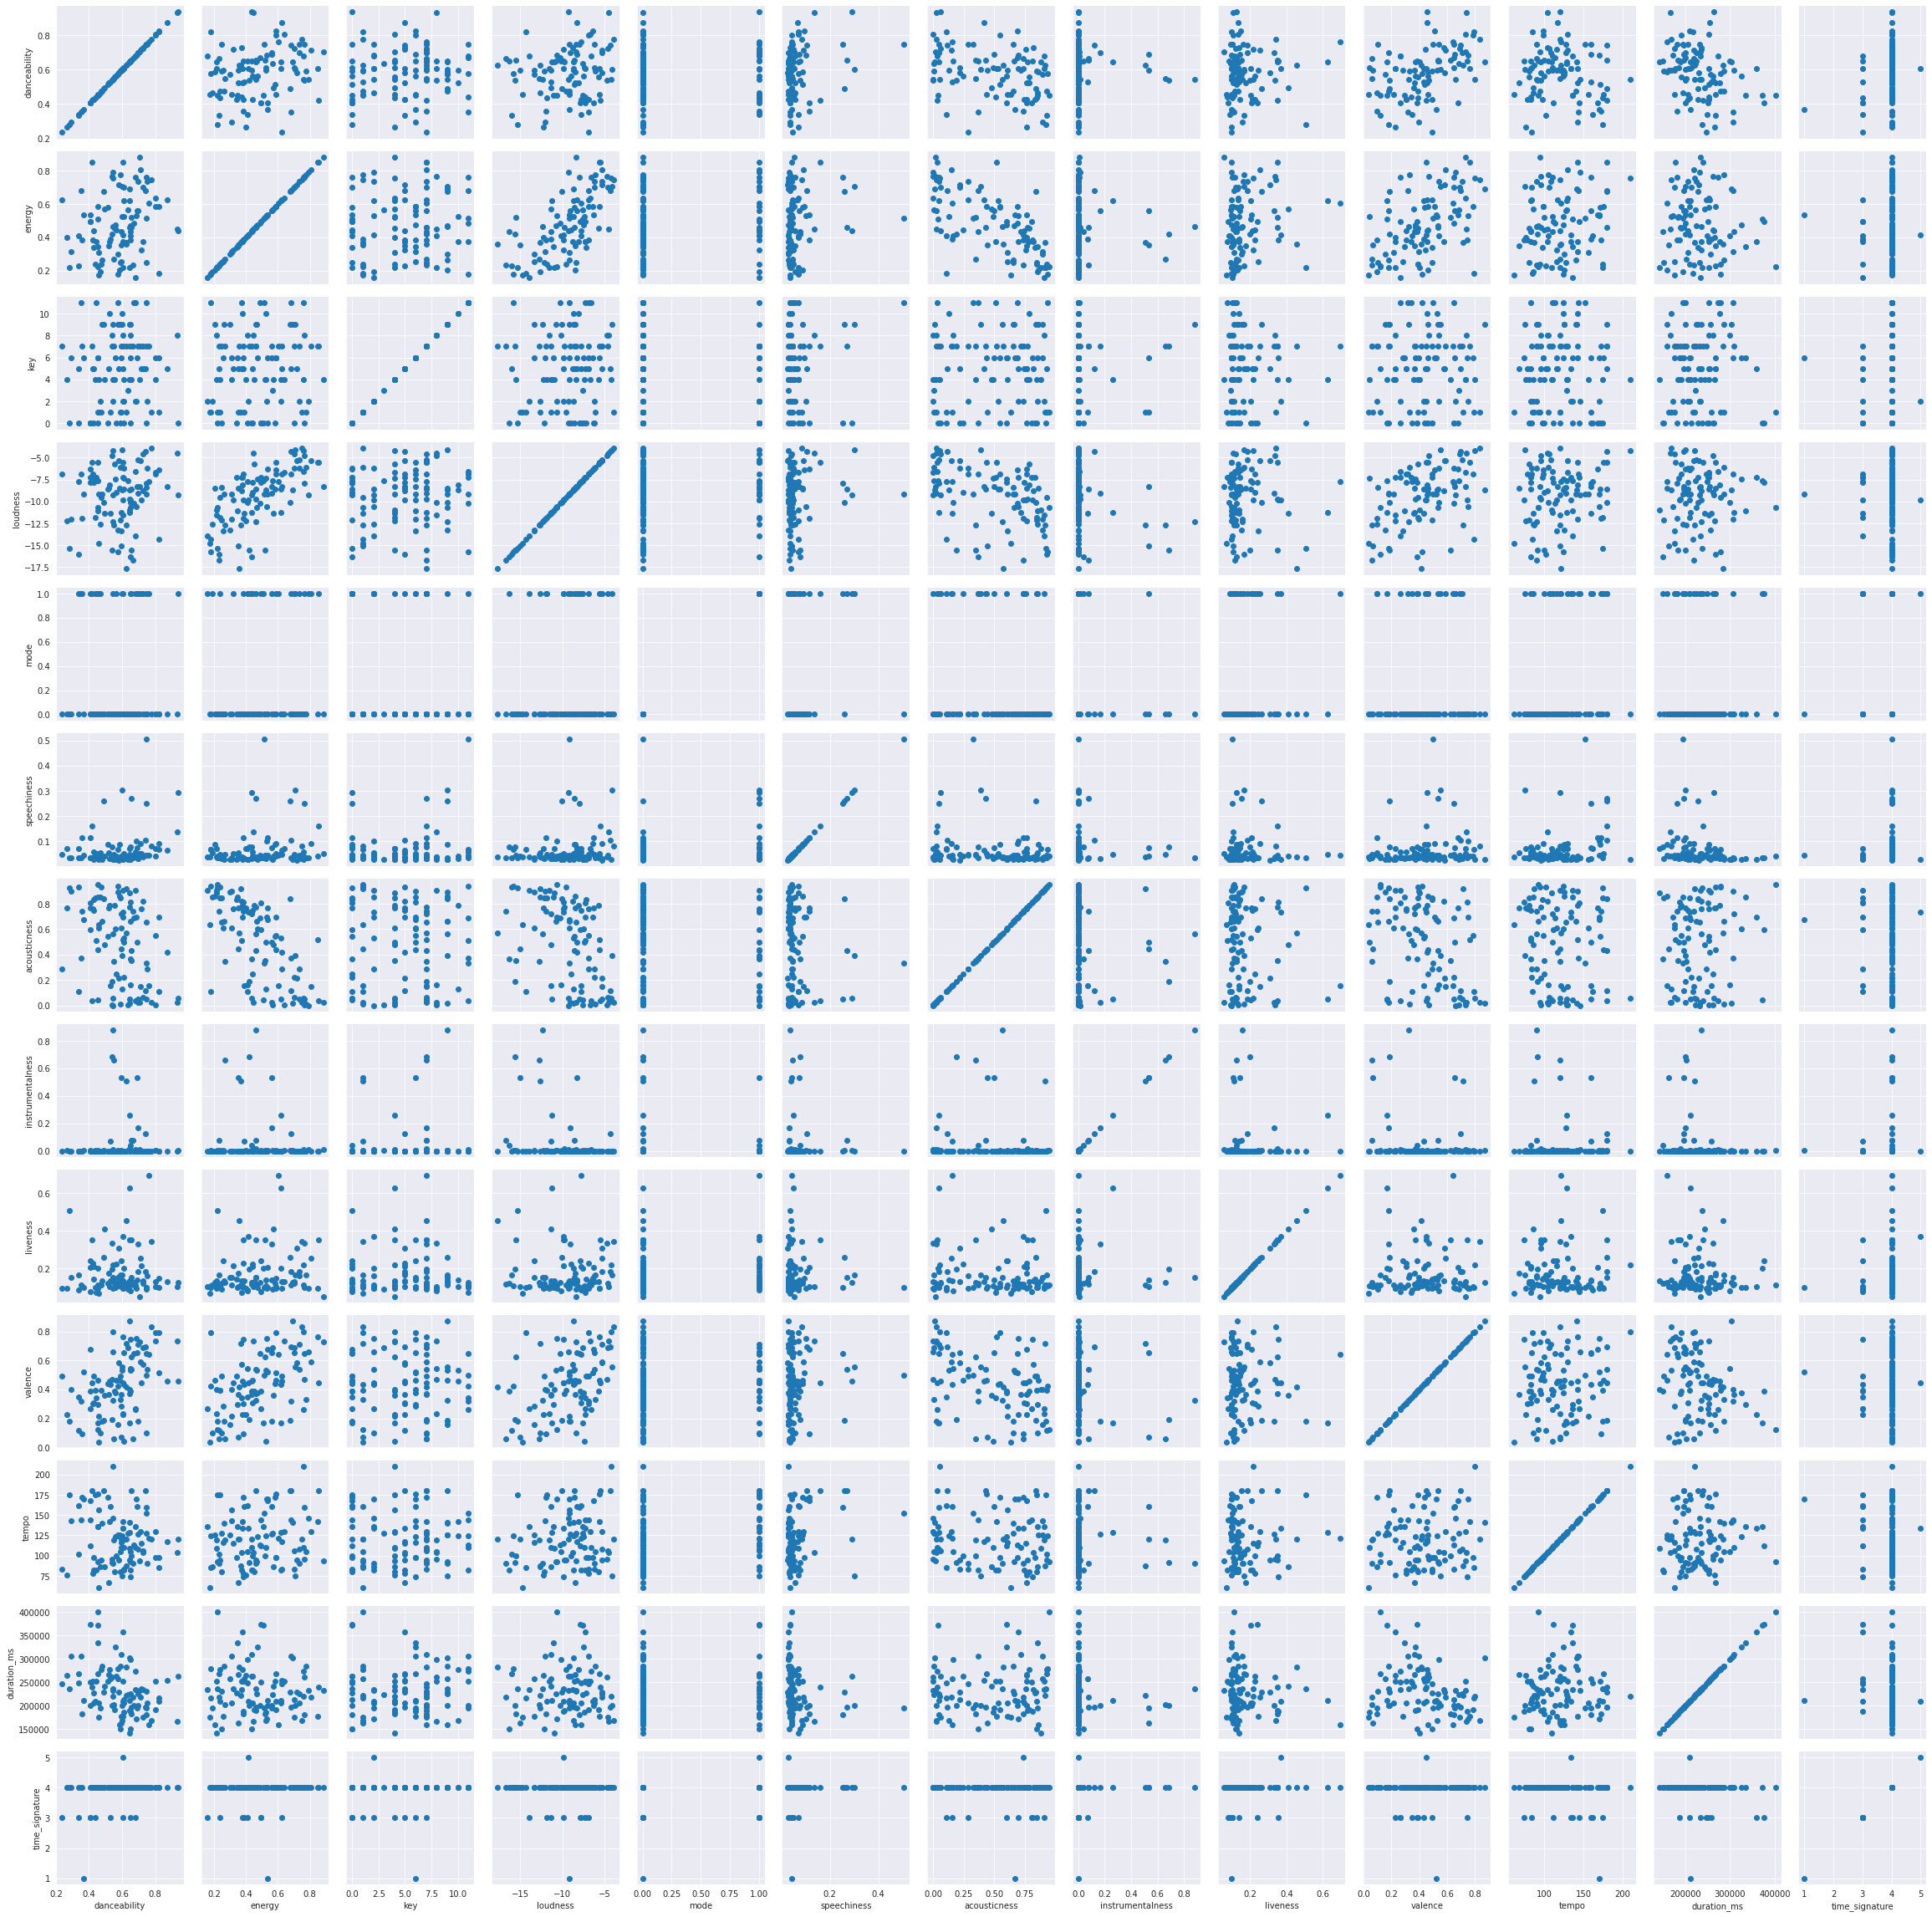

In [171]:
g = sns.PairGrid(playlist_tracks)
g.map(plt.scatter)

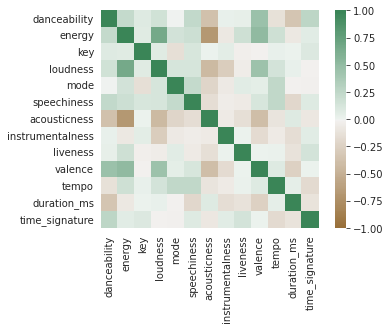

In [172]:
axis_corr = sns.heatmap(
playlist_tracks.corr(),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

# **2.      Analysis**

It is often advisable to analyze the distribution of various voice features to gain insights, but it will be more interesting to examine the correlation between voice features and see which ones will group together through hierarchical clustering using **Seaborn**.

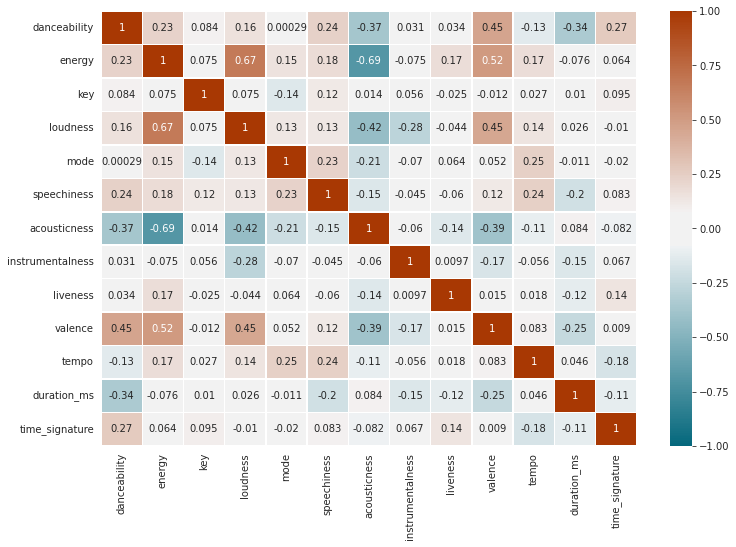

In [173]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))

cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
# artist ve track gibi string değerleri çıkarıyoruz
sns.heatmap(playlist_tracks.corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

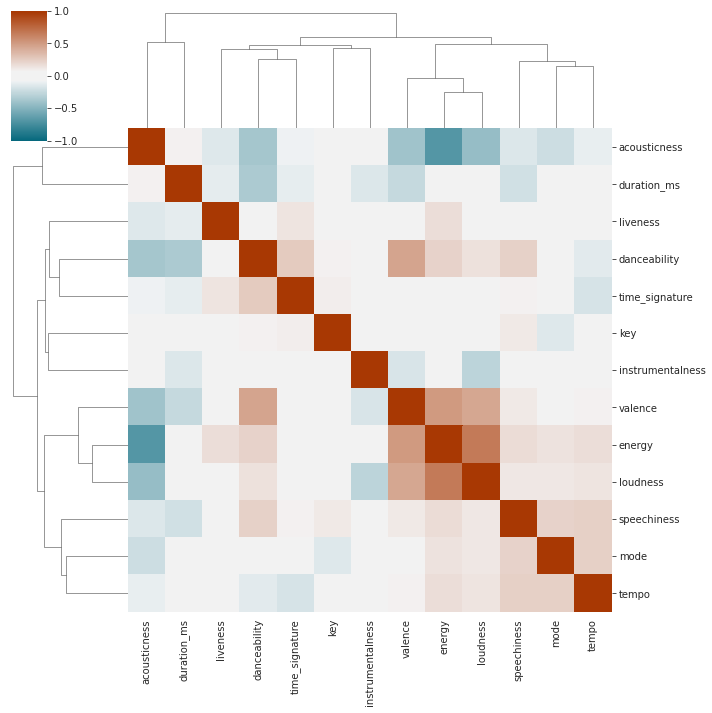

In [174]:
sns.clustermap(playlist_tracks.corr(), cmap = cmap, vmin = -1, vmax = 1)

The data shows that there is no significant correlation between the various variables, except for a strong positive correlation between energy and loudnesses. This is to be expected as energy and loudness are closely related concepts in audio engineering. To better understand our data and to simplify the visualization of the large number of audio features, I will use principal component analysis (PCA) to decompose the features into a more manageable set of variables.

To begin the process of applying principal component analysis (PCA), I will first use Scikit-learn's StandardScaler() function to scale the data. This step is necessary to ensure that the different variables are on the same scale and do not unfairly dominate the analysis due to their size. Next, I will create a PCA example specifically designed to identify the two principal components of the data. With this example, I will first visualize how the two principal components are identified based on the original variables and then explore the variation explained by different numbers of principal components.

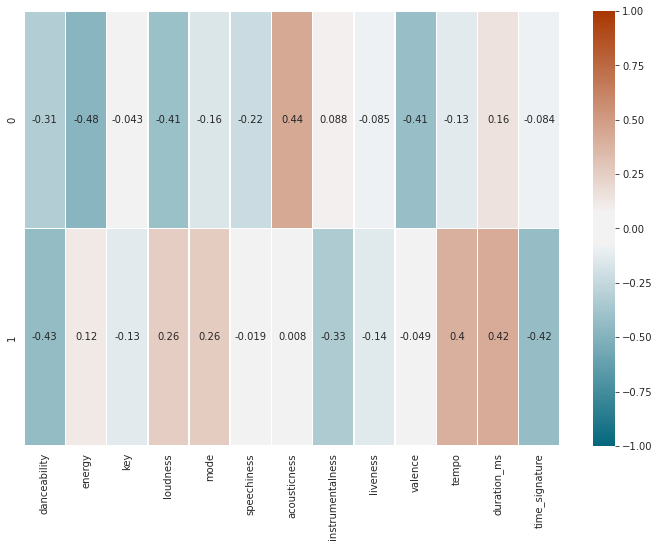

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(playlist_tracks)
scaled_data = scaler.transform(playlist_tracks)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

pca_corr = pd.DataFrame(pca.components_, columns = playlist_tracks.columns)

plt.figure(figsize = (12,8))
sns.heatmap(pca_corr, cmap = cmap, vmin = -1, vmax = 1, annot = True, lw = .5, linecolor = 'white')

Text(0, 0.5, 'PC2: 0.13')

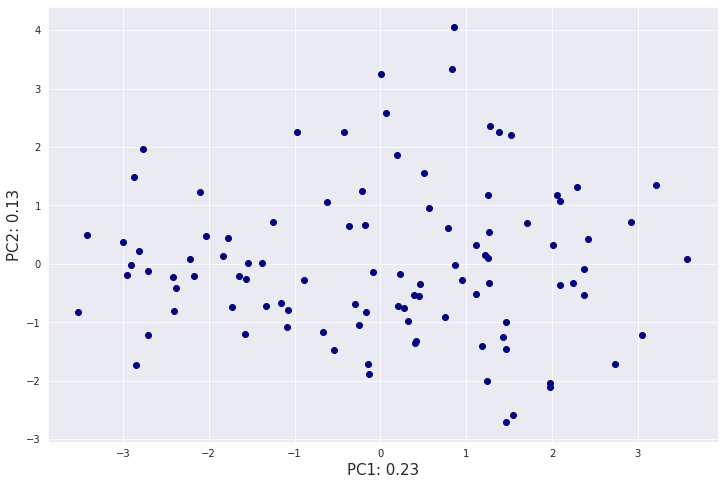

In [176]:
plt.figure(figsize = (12, 8))
plt.scatter(data_pca[:,0], data_pca[:,1], c = 'navy')
plt.xlabel('PC1: {:.2f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.2f}'.format(pca.explained_variance_ratio_[1]), size = 15)

It is clear that the first two principal components do not explain a significant amount of the variance present in the data (as a side note, the numbers along the axis headings represent the proportion of variance explained by that principal component). By increasing the number of principal components extracted from the PCA, it is possible to see a higher level of variance explanation."

Text(0, 0.5, 'Açıklanan Varyans Oranı')

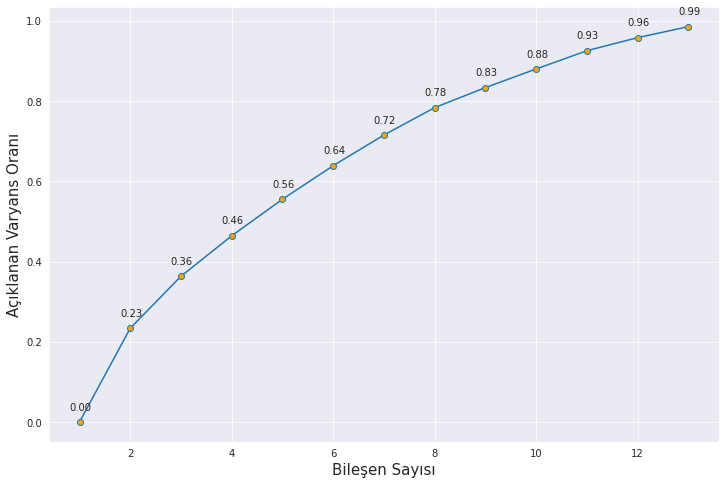

In [177]:
exp_var_ratio = []

for n in range(0,13):
    pca = PCA(n_components = n)
    pca.fit(scaled_data)
    pca.transform(scaled_data)
    exp_var_ratio.append(sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.plot(range(1,14), exp_var_ratio, marker = 'o', markerfacecolor = 'orange', markersize = 6)
for i,j in zip(range(1,14),exp_var_ratio):
    ax.annotate('{:.2f}'.format(j),xy=(i-.2,j+.03))
plt.xlabel('Bileşen Sayısı', size = 15)
plt.ylabel('Açıklanan Varyans Oranı', size = 15)

There is no clear " bracket" point in this graph, which is problematic because I do not want to use more than 8 principal components in my clustering algorithm if they only explain a small fraction of the variance in the data (e.g. 80%). It is important to ensure that the number of principal components chosen strikes a balance between simplicity and capturing a sufficient fraction of the variance in the data.

# **3. Model Development**

In [181]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(playlist_tracks)

In [182]:
from sklearn import metrics

from sklearn.cluster import DBSCAN

eps_list = [2, 2.5, 3, 3.5, 4]

for eps in eps_list:
    db = DBSCAN(eps=eps, min_samples=2).fit(X)   

    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    
    silhouette_coef = metrics.silhouette_score(X, labels, metric='euclidean')
    print(silhouette_coef)

Estimated number of clusters: 8
Estimated number of noise points: 62
-0.08802118266500837
Estimated number of clusters: 6
Estimated number of noise points: 38
-0.02087684048625031
Estimated number of clusters: 4
Estimated number of noise points: 21
0.046809019897250295
Estimated number of clusters: 3
Estimated number of noise points: 9
0.16053585186099148
Estimated number of clusters: 1
Estimated number of noise points: 5
0.2762032035188833


In [183]:
db = DBSCAN(eps=3.5, min_samples=2).fit(X)

playlist_tracks['cluster_id'] = db.labels_

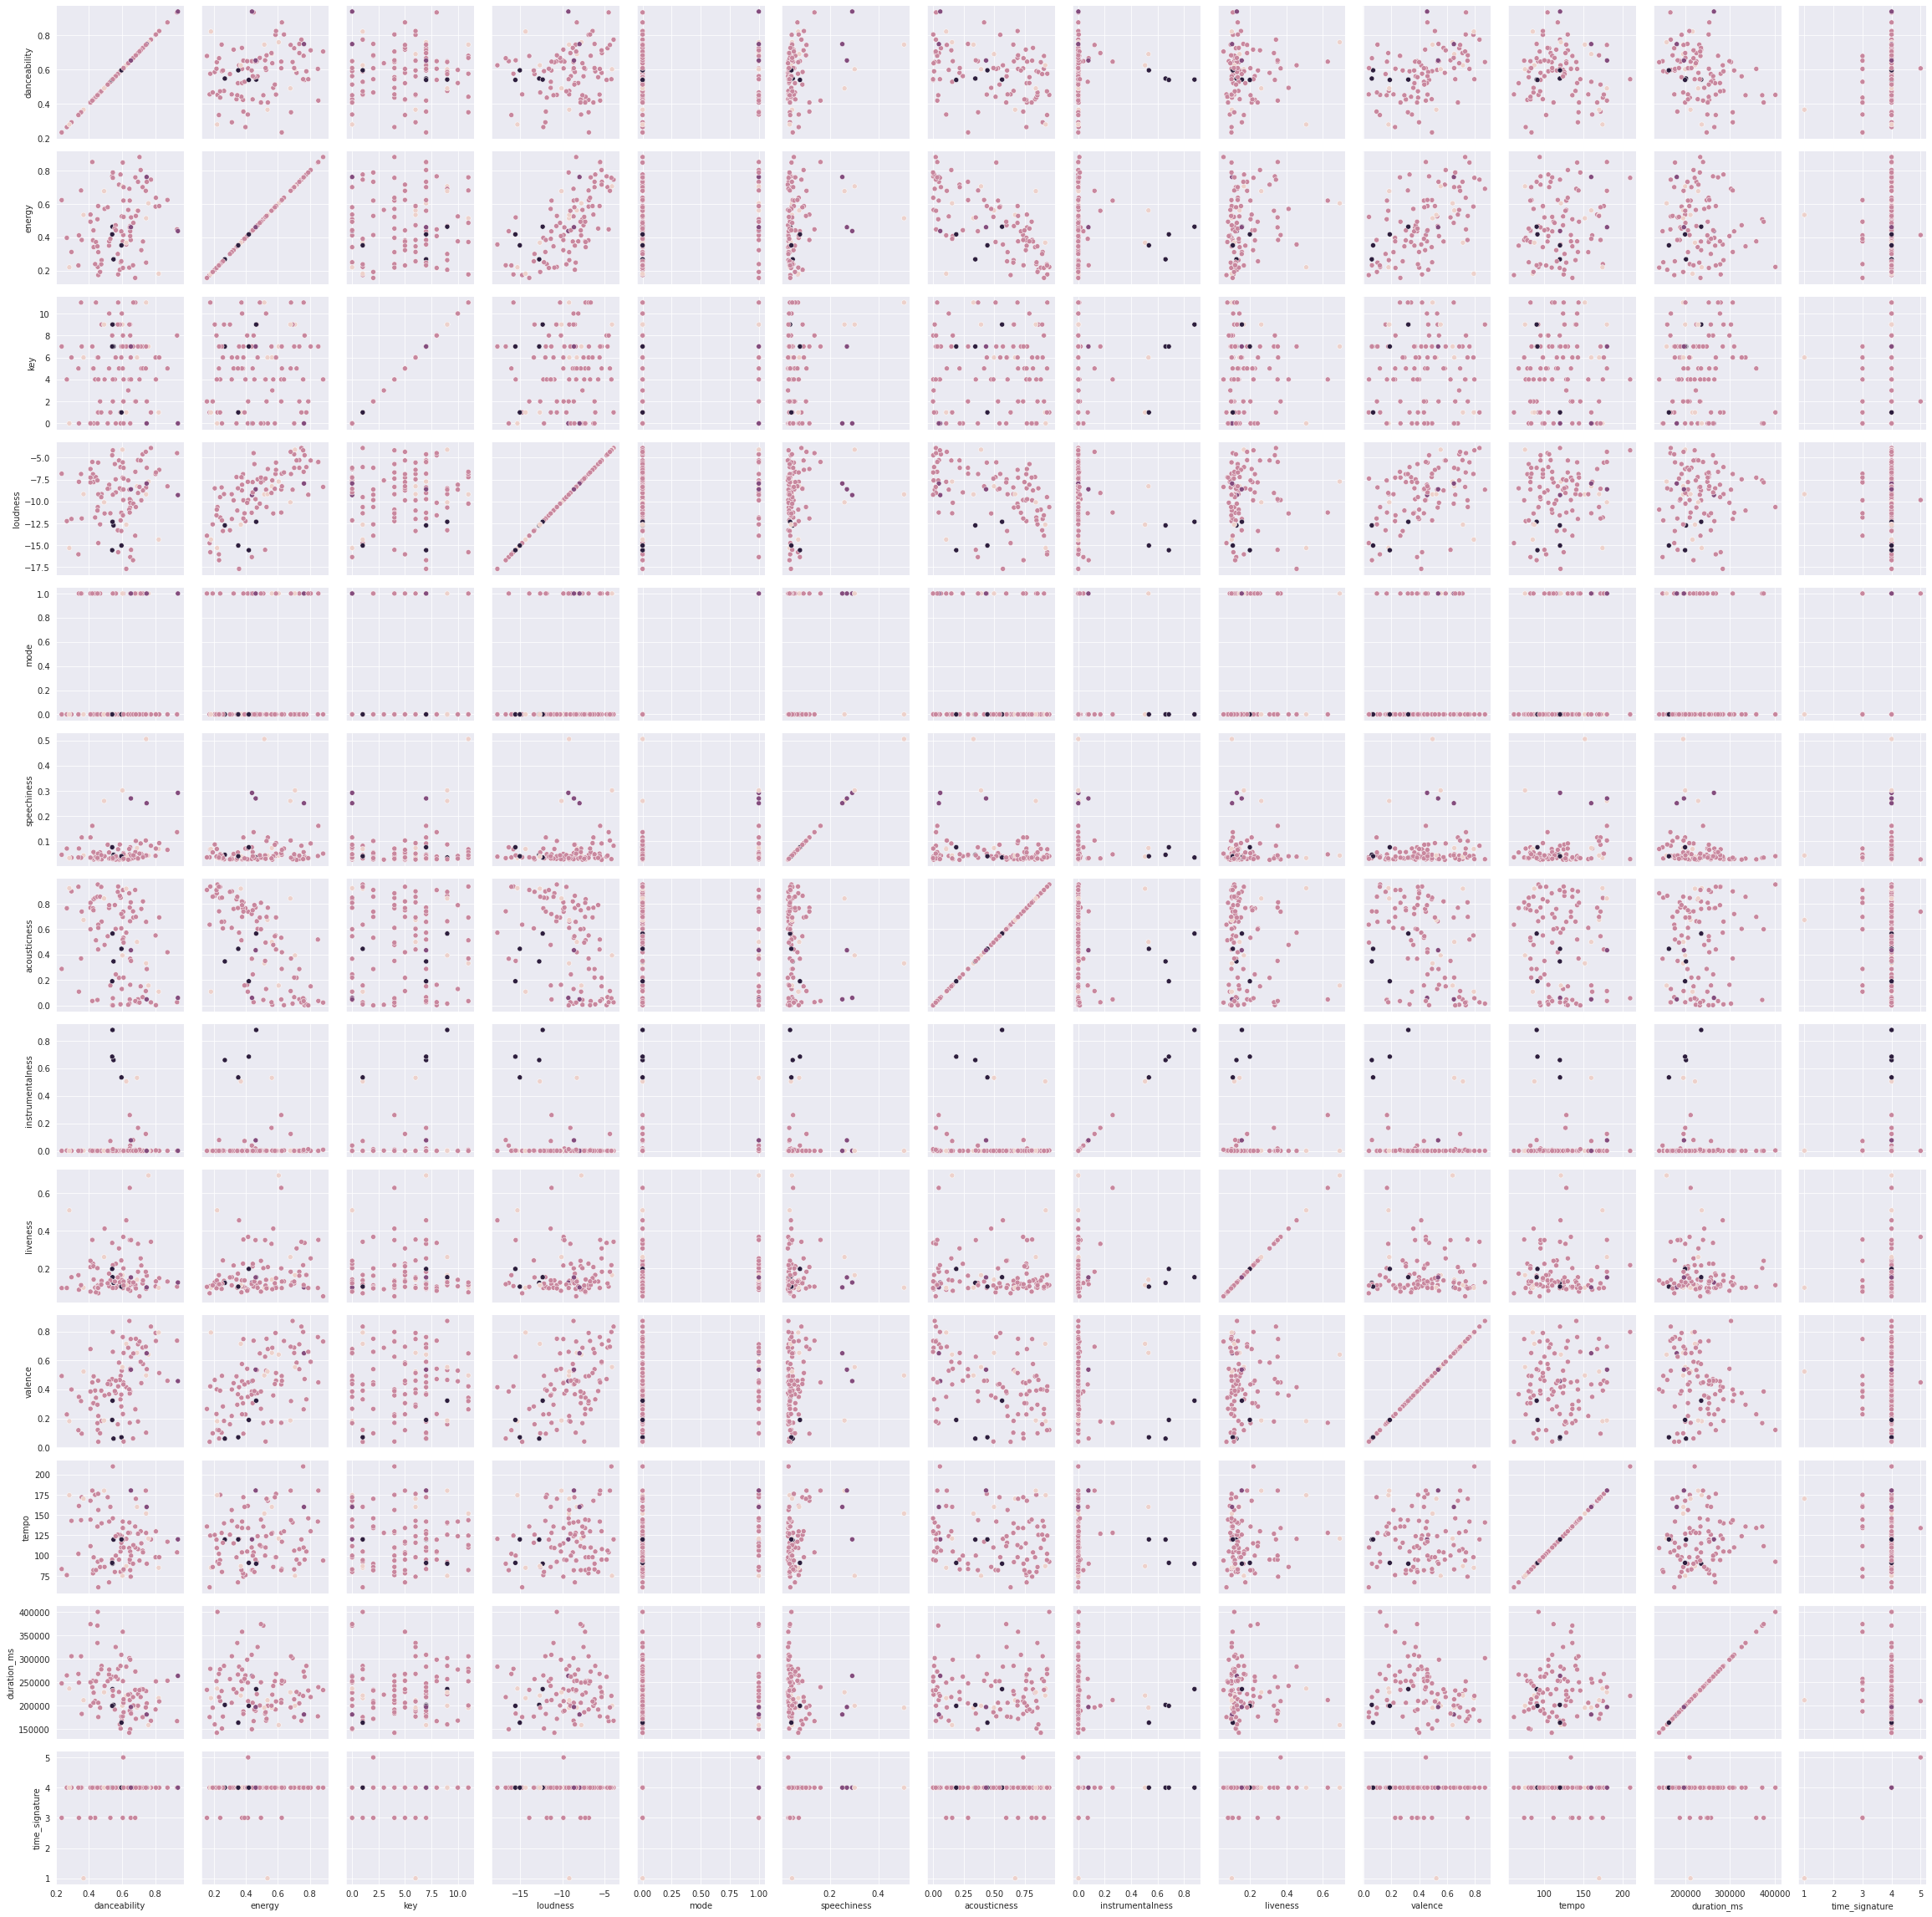

In [184]:
g = sns.PairGrid(playlist_tracks, hue = 'cluster_id')
g.map(sns.scatterplot)

# K-Means Algorithm

I will use K Means clustering to divide my playlist into 4 smaller playlists, as this seems like a reasonable balance between having a manageable number of songs in each playlist and still providing enough variety.

In [187]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(playlist_tracks)

KMeans(n_clusters=4)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


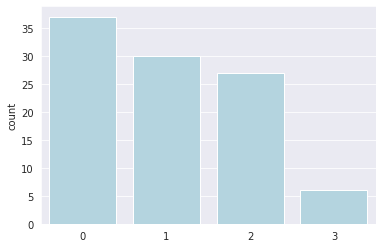

In [188]:
sns.countplot([str(group) for group in kmeans.labels_], color = 'lightblue')

One of the clusters created by the algorithm has less than 10 songs, which doesn't sound like a playlist I would listen to very often. Let's reduce the number of clusters by one:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


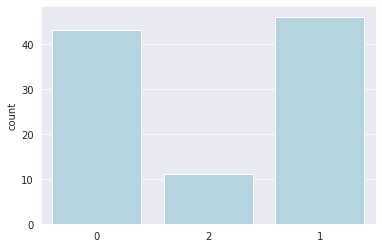

In [191]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(playlist_tracks)
sns.countplot([str(group) for group in kmeans.labels_], color = 'lightblue')

We now return to PCA to determine whether any of the principal components can correctly predict the cluster to which a song is assigned.

# Visualizing Clusters

Text(0, 0.5, 'PC2: 0.13')

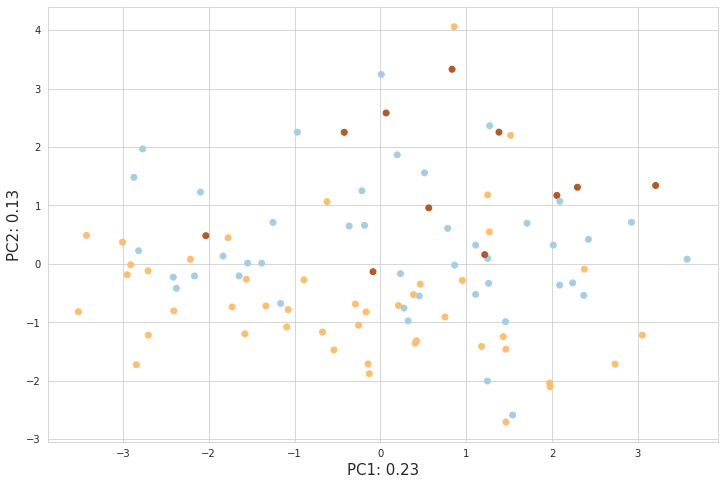

In [192]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

sns.set_style('whitegrid')

plt.figure(figsize = (12, 8))
plt.scatter(data_pca[:,0], data_pca[:,1], c = list(kmeans.labels_), cmap = 'Paired')
plt.xlabel('PC1: {:.2f}'.format(pca.explained_variance_ratio_[0]), size = 15)
plt.ylabel('PC2: {:.2f}'.format(pca.explained_variance_ratio_[1]), size = 15)

As you can imagine, the first and second principal components don't really help us visualize the differences between the different clusters. Maybe we can get some clarification by adding a third principal component?

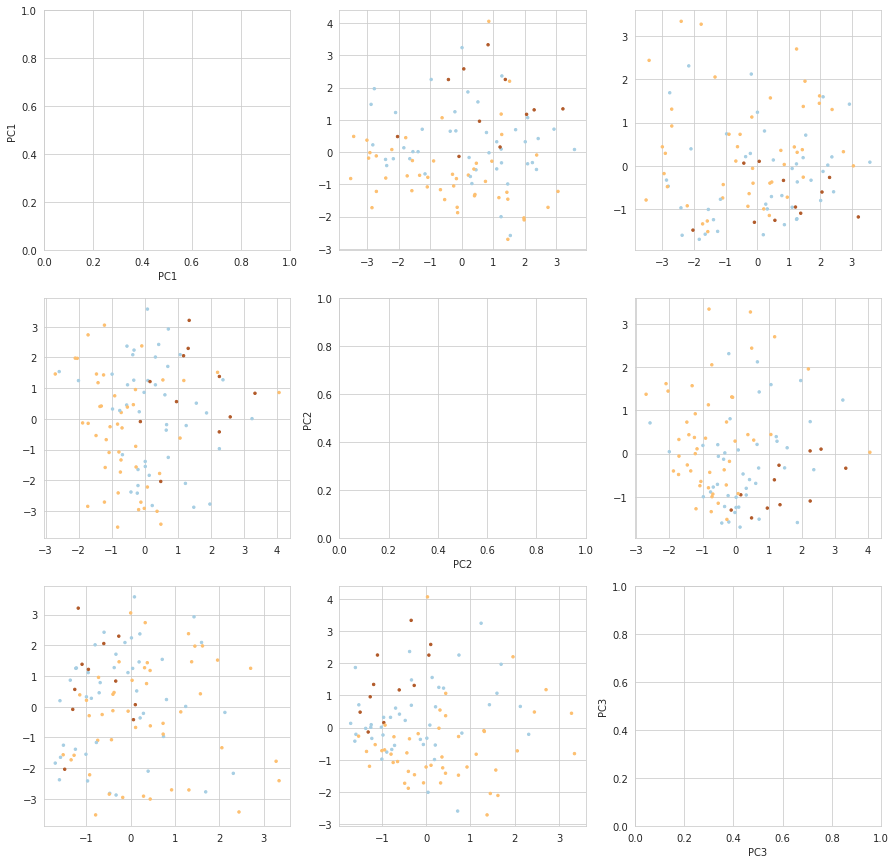

In [193]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3,figsize = (15,15), squeeze = False)

for x in range(0,3):
    for y in range(0,3):
        if x != y:
            ax[x, y].scatter(data_pca[:,x], data_pca[:,y], c = list(kmeans.labels_), cmap = 'Paired', s = 6)
        else:
            ax[x,y].set_ylabel('PC{}'.format(x+1))
            ax[x,y].set_xlabel('PC{}'.format(x+1))
            continue

Even with a third principal component, it is not enough to visualize a clear distinction between clusters. In general, this makes sense given the fact that each principal component explains a small amount of the variance in the data.

Let us now look at the differences in the vocal characteristics of each group.

In [194]:
playlist_tracks['group'] = list(kmeans.labels_)
playlist_tracks = playlist_tracks.astype({'group': str})
playlist_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id,group
0,0.696,0.734,7,-5.294,1,0.0298,0.0485,0.000000,0.183,0.711,107.987,225080.0,4.0,0,0
1,0.581,0.717,5,-5.325,0,0.0260,0.2170,0.000051,0.307,0.584,95.027,229587.0,4.0,0,0
2,0.294,0.312,6,-12.008,0,0.0346,0.8970,0.000000,0.154,0.399,142.878,306059.0,4.0,0,2
3,0.476,0.263,9,-9.166,0,0.0282,0.6590,0.000014,0.135,0.182,139.810,285387.0,4.0,0,0
4,0.576,0.177,11,-15.799,0,0.0680,0.9350,0.002290,0.107,0.421,124.642,279127.0,4.0,0,0


In [195]:
playlist_tracks[playlist_tracks['group'] == '0'].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.553721,0.481651,4.906977,-9.308814,0.209302,0.056202,0.494923,0.034871,0.169740,0.418674,120.869814,250274.232558,3.883721,0.000000
std,0.152896,0.203054,3.510623,3.255482,0.411625,0.054378,0.352993,0.152813,0.105679,0.179123,33.720726,19136.749370,0.324353,0.436436
min,0.235000,0.156000,0.000000,-17.705000,0.000000,0.026000,0.000509,0.000000,0.052600,0.101000,66.991000,221253.000000,3.000000,-1.000000
25%,0.464500,0.345500,1.500000,-11.367000,0.000000,0.032900,0.083600,0.000000,0.100100,0.285000,94.761500,233907.500000,4.000000,0.000000
50%,0.544000,0.438000,5.000000,-8.563000,0.000000,0.038800,0.565000,0.000014,0.132000,0.434000,117.093000,252333.000000,4.000000,0.000000
75%,0.642500,0.631500,7.500000,-7.054000,0.000000,0.053100,0.812500,0.001950,0.199500,0.491000,140.868000,264532.000000,4.000000,0.000000
max,0.937000,0.883000,11.000000,-4.168000,1.000000,0.292000,0.935000,0.879000,0.509000,0.796000,209.873000,285387.000000,4.000000,2.000000


In [196]:
playlist_tracks[playlist_tracks['group'] == '1'].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.628326,0.482217,4.847826,-9.472652,0.260870,0.081672,0.474735,0.069111,0.186707,0.460580,117.911304,189945.065217,3.913043,0.043478
std,0.125354,0.183234,3.083774,3.544915,0.443961,0.087924,0.284704,0.174905,0.131660,0.239103,33.576162,19765.131483,0.508859,0.665216
min,0.356000,0.173000,0.000000,-16.712000,0.000000,0.027800,0.024100,0.000000,0.068800,0.038100,60.944000,142421.000000,1.000000,-1.000000
25%,0.587250,0.360000,2.000000,-11.921750,0.000000,0.040700,0.197250,0.000000,0.106250,0.287750,89.995500,176283.750000,4.000000,0.000000
50%,0.644500,0.501000,5.500000,-9.106000,0.000000,0.048050,0.508500,0.000029,0.131000,0.504500,114.395500,195788.500000,4.000000,0.000000
75%,0.708000,0.600750,7.000000,-6.517750,0.750000,0.085825,0.737750,0.002433,0.206250,0.650500,139.922000,206153.500000,4.000000,0.000000
max,0.932000,0.850000,11.000000,-3.908000,1.000000,0.506000,0.882000,0.685000,0.694000,0.833000,180.212000,218800.000000,5.000000,2.000000


In [197]:
playlist_tracks[playlist_tracks['group'] == '2'].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,0.496636,0.450000,5.363636,-9.173727,0.272727,0.032027,0.536918,0.000362,0.131545,0.369545,125.090636,335153.818182,3.818182,0.0
std,0.120833,0.144088,3.640679,1.881376,0.467099,0.004084,0.339745,0.000936,0.048925,0.203706,17.596591,35516.373835,0.404520,0.0
min,0.294000,0.222000,0.000000,-12.008000,0.000000,0.027200,0.014100,0.000000,0.082000,0.120000,92.417000,298587.000000,3.000000,0.0
25%,0.430000,0.361000,3.000000,-10.846000,0.000000,0.028700,0.265500,0.000003,0.100600,0.261000,110.862500,305978.500000,4.000000,0.0
50%,0.453000,0.436000,6.000000,-8.666000,0.000000,0.031200,0.602000,0.000008,0.112000,0.364000,134.018000,325733.000000,4.000000,0.0
75%,0.599500,0.501500,7.500000,-7.543500,0.500000,0.034500,0.786500,0.000079,0.140500,0.392000,138.312000,364829.000000,4.000000,0.0
max,0.649000,0.692000,11.000000,-6.876000,1.000000,0.040700,0.951000,0.003120,0.241000,0.872000,143.672000,400705.000000,4.000000,0.0


In [198]:
means = pd.DataFrame(index = range(0,3), 
                    columns = list(playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean'].index))
means.iloc[0] = playlist_tracks[playlist_tracks['group'] == '0'].describe().loc['mean']
means.iloc[1] = playlist_tracks[playlist_tracks['group'] == '1'].describe().loc['mean']
means.iloc[2] = playlist_tracks[playlist_tracks['group'] == '2'].describe().loc['mean']
means

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id
0,0.553721,0.481651,4.906977,-9.308814,0.209302,0.056202,0.494923,0.034871,0.16974,0.418674,120.869814,250274.232558,3.883721,0.0
1,0.628326,0.482217,4.847826,-9.472652,0.26087,0.081672,0.474735,0.069111,0.186707,0.46058,117.911304,189945.065217,3.913043,0.043478
2,0.496636,0.45,5.363636,-9.173727,0.272727,0.032027,0.536918,0.000362,0.131545,0.369545,125.090636,335153.818182,3.818182,0.0


# **Conclusion and Future Works**

I used the unsupervised learning method in this project. After encountering various difficulties with this method, I plan to develop my project with supervised learning methods in the future. I aim to make it a larger project with different algorithms.
Currently, my algorithm has a structure that brings together music from the genres that have the closest correlation with each other. When I get my data from Spotify, I may have a more comprehensive result. 
There will be more than one playlist happy, energetic, acoustic, sad etc. it can turn the mixed playlist into new lists according to your choices.

References
* Automated Mood Based Music Playlist Generation By Clustering The Audio Features /Mahta Bakhshizadeh, Ali Moeini; Mina Latifi; Maryam Tayefeh Mahmoudi
* Clustering Pop Songs Based On Spotify Data Using K-Means And K-Medoids Algorithm / Novia Ayu Privandhani, Sulastri
* Analisis Klaster Atribut Musik pada Global Top 50 dengan Data Spotify dengan Menggunakan Algoritma K-Means.
* Python Data Science Handbook
* https://developer.spotify.com
* https://www.kaggle.com/code/mohitkr05/spotify-data-visualization